# Tempo typology

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from unidip.dip import diptst as diptest

from helpers import cm2inch, title
matplotlib.style.use('styles.mplstyle')

In [5]:
dfs = dict(
    maidu = pd.read_csv('densmore-metadata/maidu.csv'),
    menominee = pd.read_csv('densmore-metadata/menominee.csv'),
    choctaw = pd.read_csv('densmore-metadata/choctaw.csv'),
    nootka = pd.read_csv('densmore-metadata/nootka.csv'),
    ute = pd.read_csv('densmore-metadata/ute.csv'),
)

In [6]:
# Collect all tempi in all cultures
tempi = []
for culture, df in dfs.items():
    col = 'bpm_voice' if 'bpm_voice' in df.columns else 'bpm'
    single_value = df[col].str.contains("\|") == False
    not_null = df[col].isna() == False
    bpm = df[single_value & not_null][col].astype(int)
    tempi.extend([(culture, t) for t in bpm])

tempi = pd.DataFrame(tempi, columns=['culture', 'bpm'])

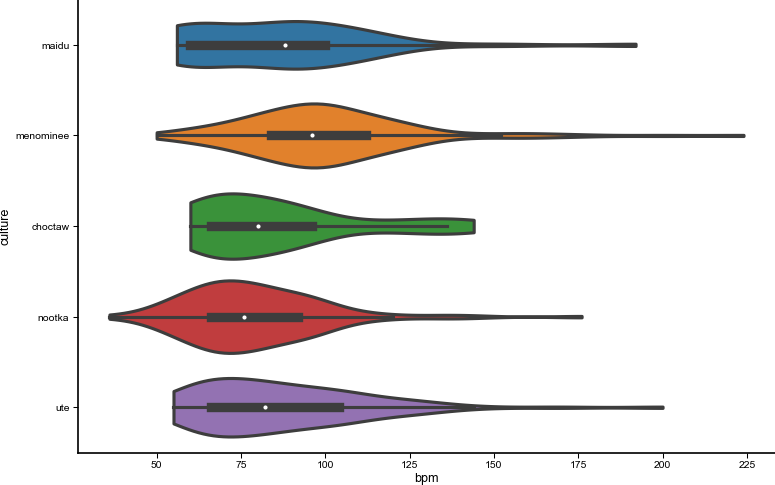

In [7]:
# Quick violinplot of tempo distributions
sns.violinplot(data=tempi, x='bpm', y='culture', cut=0)

In [8]:
maidu_tempi = tempi.query("culture=='maidu'").bpm
nootka_tempi = tempi.query("culture=='nootka'").bpm

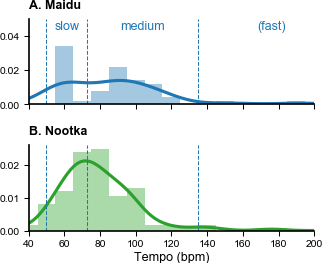

In [10]:
fig, (ax1, ax2) = plt.subplots(2, figsize=cm2inch(6, 5), tight_layout=True, sharex=True)

dist_props = dict(bins=np.arange(35,255,10))

def maidu_categories(ax):
    ax.axvline(50, c='C0', ls='--', lw=.5)
    ax.axvline(73, c='C0', ls='--', lw=.5)
    ax.axvline(135, c='C0', ls='--', lw=.5)

title('A. Maidu', ax=ax1)
sns.distplot(maidu_tempi, ax=ax1, **dist_props)
plt.xlim(40, 200)
ax1.set_ylim(0, 0.05)
ax1.set_xlabel('')
maidu_categories(ax1)
textprops = dict(xycoords='axes fraction', xytext=(0, -5), textcoords='offset points',
            color='C0', fontsize=6)
ax1.annotate('slow', (.09, 1), **textprops)
ax1.annotate('medium', (.32, 1), **textprops)
ax1.annotate('(fast)', (.8, 1), **textprops)

plt.sca(ax2)
title('B. Nootka')
sns.distplot(nootka_tempi, color='C2', ax=ax2, **dist_props)
maidu_categories(ax2)
plt.xlabel('Tempo (bpm)')

plt.savefig('../figures/fig-tempo-typology/tempo-distributions-raw.pdf')

In [11]:
dip, pval, (left_idx, right_idx) = diptest(np.msort(maidu_tempi), is_hist=False, numt=1000)
pval, left_idx, right_idx

(0.03196803196803197, 0, 1)

In [12]:
dip, pval, (left_idx, right_idx) = diptest(np.msort(nootka_tempi), is_hist=False, numt=1000)
pval, left_idx, right_idx

(0.9410589410589411, 10, 12)

## Old plot

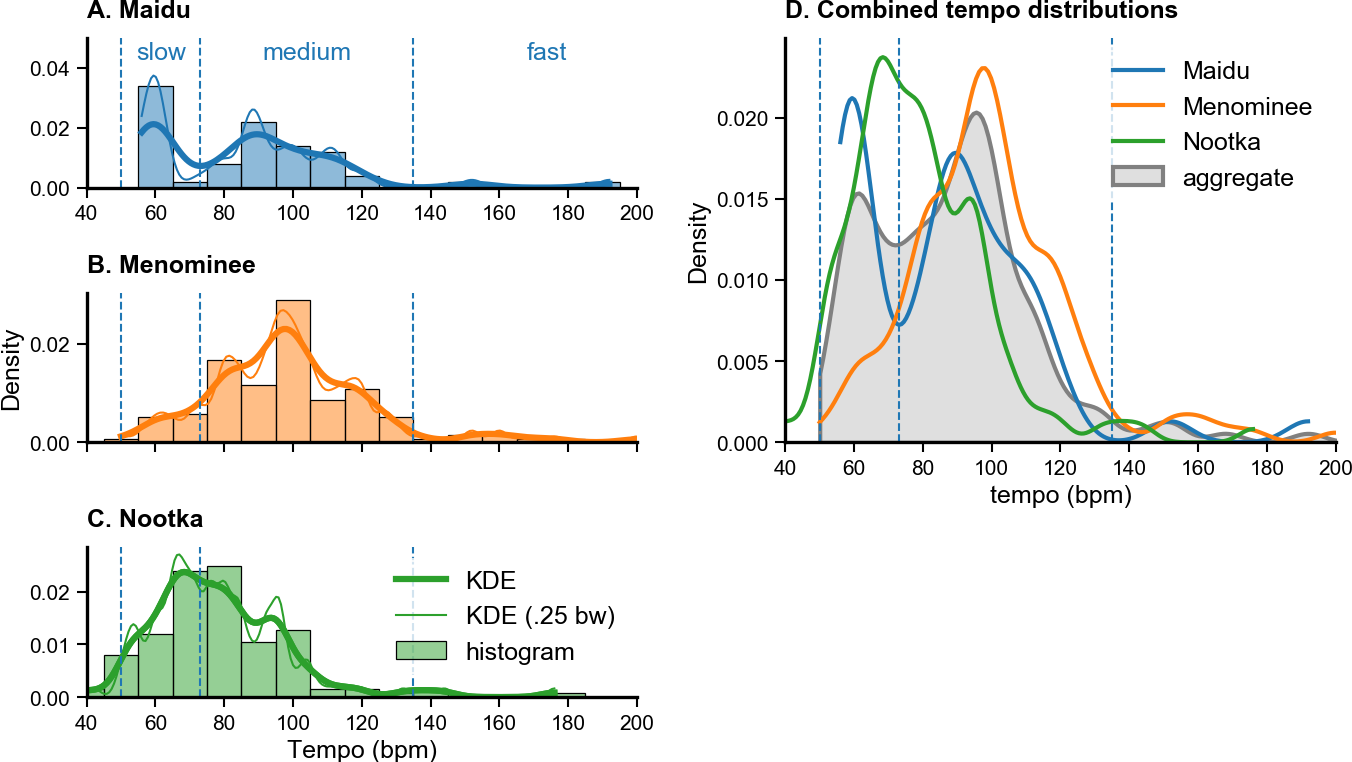

In [240]:
def maidu_categories():
    plt.axvline(50, c='C0', ls='--', lw=.5)
    plt.axvline(73, c='C0', ls='--', lw=.5)
    plt.axvline(135, c='C0', ls='--', lw=.5)
    
fig = plt.figure(figsize=cm2inch(12, 7))
g = plt.GridSpec(3, 2)

props = dict(kde_kws=dict(cut=0, bw_adjust=.5), kde=True, binwidth=10, binrange=(35, 225), lw=.3, stat='density')

ax1 = fig.add_subplot(g[0, 0])
title('A. Maidu')
sns.histplot(tempi['maidu'], **props, label='histogram')
sns.kdeplot(tempi['maidu'], cut=0, color='C0', bw_adjust=.25, lw=.5)
plt.ylim(0, 0.05)
# ax1.set_xticklabels([])
plt.ylabel('')
maidu_categories()
plt.xlim(40, 200)
textprops = dict(xycoords='axes fraction', xytext=(0, -5), textcoords='offset points',
            color='C0', fontsize=6)
plt.annotate('slow', (.09, 1), **textprops)
plt.annotate('medium', (.32, 1), **textprops)
plt.annotate('fast', (.8, 1), **textprops)

ax2 = fig.add_subplot(g[1, 0])
title('B. Menominee')
sns.histplot(tempi['menominee'], **props, color='C1')
sns.kdeplot(tempi['menominee'], cut=0, bw_adjust=.25, lw=.5, color='C1')

ax2.set_xticklabels([])
maidu_categories()
plt.xlim(40, 200)

ax3 = fig.add_subplot(g[2, 0])
title('C. Nootka')
sns.histplot(tempi['nootka'], **props, color='C2', label='histogram')
sns.kdeplot(tempi['nootka'], cut=0, bw_adjust=.5, color='C2', label='KDE')
sns.kdeplot(tempi['nootka'], cut=0, bw_adjust=.25, lw=.5, color='C2', label='KDE (.25 bw)')
plt.xlabel('Tempo (bpm)')
plt.ylabel('')
plt.legend()
maidu_categories()
plt.xlim(40, 200)

ax4 = fig.add_subplot(g[:2, 1])
bw_adjust = .5
sns.kdeplot(combined, cut=0, color='.5', fill=True, label='aggregate', bw_adjust=bw_adjust)
sns.kdeplot(tempi['maidu'], cut=0, label='Maidu', lw=1, ls='-', bw_adjust=bw_adjust)
sns.kdeplot(tempi['menominee'], cut=0, label='Menominee',ls='-', lw=1, bw_adjust=bw_adjust)
sns.kdeplot(tempi['nootka'], cut=0, label='Nootka', lw=1, ls='-',bw_adjust=bw_adjust)
plt.legend()
plt.xlabel('tempo (bpm)')
title('D. Combined tempo distributions')
maidu_categories()

plt.xlim(40, 200)


plt.tight_layout()
plt.savefig('../figures/figZ1-tempo-distributions.pdf')